In [242]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [243]:
def get_data_spam():
    data = pd.read_csv("datasets/spam.csv").values
    points = data[:, 1:].astype('float64')
    labels0 = data[:, 0]
    labels = []
    for i in labels0:
        if (i == 1):
            labels.append(1)
        else:
            labels.append(0)
    return np.array(points), np.array(labels)

def get_data_cancer():
    data = pd.read_csv("datasets/cancer.csv").values
    points = data[:, 1:].astype('float64')
    labels0 = data[:, 0]
    labels = []
    for i in labels0:
        if (i == 'M'):
            labels.append(1)
        else:
            labels.append(0)
    return np.array(points), np.array(labels)

In [244]:
def draw_plot(title, xs, ys):
    plt.plot([0, 1], [0, 1], 'y')
    plt.plot(xs, ys)
    plt.title(title)
    plt.show()

In [245]:
def gini(labels):
    p = labels.sum() / labels.shape[0]
    return 2 * p * (1 - p)

In [246]:
def find(x, conds):
    result = True
    for cond in conds:
        result = result and cond(x)
    return result

def build_tree(features, data, labels, depth=10, conds=[], result=None, i=1):
    if result is None:
        result = np.zeros((2 ** (depth + 1), 3))
    current = np.apply_along_axis(lambda x: find(x, conds), 1, data)
    total = labels.shape[0]
    positive = labels[current].sum()
    result[i][2] = positive / total
    if (depth == 0):
        return
    best_f = -1
    best_t = -1
    best_score = -1
    if current.sum() > 0:
        for f_ind, f in enumerate(features):
            for t in f:
                left = np.apply_along_axis(lambda x : x[f_ind] < t, 1, data[current])
                right = np.apply_along_axis(lambda x : x[f_ind] >= t, 1, data[current])
                if (left.sum() < 1 or right.sum() < 1):
                    score = 0
                else :
                    c = current.sum() * gini(labels[current])
                    l = left.sum() * gini(labels[current][left])
                    r = right.sum() * gini(labels[current][right])
                    score = c - l - r
                if best_score < score:
                    best_score = score
                    best_t = t
                    best_f = f_ind
        result[i][0], result[i][1] = best_f, best_t
    if (depth > 0):
        build(features, data, labels, depth - 1, conds + [lambda x : x[best_f] < best_t], result, 2 * i)
        build(features, data, labels, depth - 1, conds + [lambda x : x[best_f] >= best_t], result, 2 * i + 1)
    return result

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


depth = 1; auc = 0.8968253968253967
depth = 2; auc = 0.908068783068783
depth = 3; auc = 0.9150132275132276
depth = 4; auc = 0.9034391534391533
depth = 5; auc = 0.923941798941799
depth = 6; auc = 0.9353505291005291
depth = 7; auc = 0.9513888888888888
depth = 8; auc = 0.9533730158730158
depth = 9; auc = 0.9533730158730158
depth = 10; auc = 0.9533730158730158
best depth: 8
best auc: 0.9533730158730158


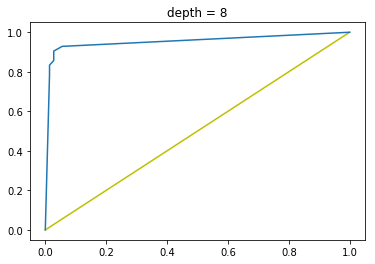

In [247]:
points, labels = get_data_cancer()
train_data, train_labels, test_data, test_labels = split_data(points, labels)
features = []
for f in points.transpose():
    features.append(np.unique(f))
features = np.array(features)
tree = build_tree(features, train_data, train_labels)
best_auc = -1
best_depth = -1
best_fpr = None
best_tpr = None
for i in range(1, 11):
    probs = []
    for x in test_data:
        j = 1
        for k in range(i):
            j = 2 * j + (x[int(tree[j][0])] >= tree[j][1])
        probs.append(tree[j][2])
    fpr, tpr, _ = roc_curve(test_labels, probs)
    auc = roc_auc_score(test_labels, probs)
    print('depth = ' + str(i) + "; auc = " + str(auc))
    if best_auc < auc:
        best_auc = auc
        best_depth = i
        best_fpr = fpr
        best_tpr = tpr
print('best depth:', best_depth)
print('best auc:', best_auc)
draw_plot('depth = ' + str(best_depth), best_fpr, best_tpr)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


depth = 1; auc = 0.003808487486398282
depth = 2; auc = 0.5038084874863983
depth = 3; auc = 0.9951033732317737
depth = 4; auc = 0.999455930359086
depth = 5; auc = 0.999455930359086
depth = 6; auc = 0.999455930359086
depth = 7; auc = 0.999455930359086
depth = 8; auc = 0.999455930359086
depth = 9; auc = 0.999455930359086
depth = 10; auc = 0.999455930359086
best depth: 4
best auc: 0.999455930359086


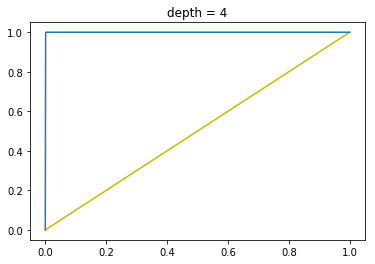

In [248]:
points, labels = get_data_spam()
train_data, train_labels, test_data, test_labels = split_data(points, labels)
features = []
for f in points.transpose():
    features.append(np.unique(f))
features = np.array(features)
tree = build_tree(features, train_data, train_labels)
best_auc = -1
best_depth = -1
best_fpr = None
best_tpr = None
for i in range(1, 11):
    probs = []
    for x in test_data:
        j = 1
        for k in range(i):
            j = 2 * j + (x[int(tree[j][0])] >= tree[j][1])
        probs.append(tree[j][2])
    fpr, tpr, _ = roc_curve(test_labels, probs)
    auc = roc_auc_score(test_labels, probs)
    print('depth = ' + str(i) + "; auc = " + str(auc))
    if best_auc < auc:
        best_auc = auc
        best_depth = i
        best_fpr = fpr
        best_tpr = tpr
print('best depth:', best_depth)
print('best auc:', best_auc)
draw_plot('depth = ' + str(best_depth), best_fpr, best_tpr)